# Vehicle and Tire Recalls Data Analysis

## Setup

In [6]:
#!/bin/bash
!curl -L -o safety-recalls.zip https://www.kaggle.com/api/v1/datasets/download/nhtsa/safety-recalls
!unzip safety-recalls.zip
!rm safety-recalls.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1899k  100 1899k    0     0  3532k      0 --:--:-- --:--:-- --:--:-- 16.1M
Archive:  safety-recalls.zip
replace database.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.csv            


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [48]:
raw_data = pd.read_csv('database.csv')
raw_data.head()

,Record ID,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
0,1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
1,2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
3,4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
4,5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


NOTES:

- fix year 9999
- change date types
- address missing values
- dates out of range

## Pre-processing

In [49]:
df = raw_data.set_index('Record ID')
df.head()

,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
Record ID,,,,,,,,,,,,,,
1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


In [50]:
df.dtypes

,0
NHTSA Campaign,object
Manufacturer Campaign,object
Vehicle Make,object
Vehicle Model,object
Model Year,int64
Vehicle Manufacturer,object
Recall Type,object
Recall Component,object
Manufacture Start Date,float64
Manufacture End Date,float64


We want to change `'Manufacture Start Date'`, `'Manufacture End Date'`, and `'Recall Notification Date'` to `pd.DateTime`.

In [51]:
def to_date(val):
  # format: YYYYMMDD.0
  if np.isnan(val):
    return pd.NaT
  val = str(int(val)) # drop the .0 and convert back to string
  if len(val) != 8: # if the remaining string does not have 8 characters (YYYYMMDD)
    return np.datetime64('NaT')
  year = int(val[:4])
  month = int(val[4:6])
  day = int(val[6:])
  if year < 1967 or year > 3000:
    return pd.NaT
  return pd.Timestamp(year, month, day)

In [52]:
date_cols = ['Manufacture Start Date', 'Manufacture End Date', 'Recall Notification Date']
for col in date_cols:
  df[col] = df[col].apply(to_date)

In [123]:
df

,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
Record ID,,,,,,,,,,,,,,
1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,1999-07-19,2001-05-31,291854.0,ODI,FORD MOTOR COMPANY,2003-02-10
2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,1999-07-19,2001-05-31,291854.0,ODI,FORD MOTOR COMPANY,2003-02-10
3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,2002-07-30,2002-08-13,86.0,MFR,"JAYCO, INC.",2002-09-23
4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaT,NaT,6223.0,MFR,MONACO COACH CORPORATION,2002-11-05
5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaT,NaT,6223.0,MFR,MONACO COACH CORPORATION,2002-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123833,16V803000,1016G (PB) & 16KWC,PETERBILT,567,2017,PACCAR Incorporated,VEHICLE,TIRES,2016-03-07,2016-10-05,202.0,MFR,PACCAR INCORPORATED,2016-12-14
123834,16V803000,1016G (PB) & 16KWC,PETERBILT,389,2017,PACCAR Incorporated,VEHICLE,TIRES,2016-03-07,2016-10-05,202.0,MFR,PACCAR INCORPORATED,2016-12-14
123835,16V803000,1016G (PB) & 16KWC,PETERBILT,367,2017,PACCAR Incorporated,VEHICLE,TIRES,2016-03-07,2016-10-05,202.0,MFR,PACCAR INCORPORATED,2016-12-14


## Missing Value Assessment

**Addressing missing values.**

In [14]:
raw_data.isna().sum()

,0
Record ID,0
NHTSA Campaign,0
Manufacturer Campaign,81547
Vehicle Make,0
Vehicle Model,0
Model Year,0
Vehicle Manufacturer,5
Recall Type,0
Recall Component,0
Manufacture Start Date,32534


**Explore `'Manufactuerer Campaign'`.**

In [54]:
df['Manufacturer Campaign'].value_counts()

,count
Manufacturer Campaign,
215-D,286
05S28,246
1.5E-67,218
13FI-1013,217
147,207
...,...
P77,1
M1,1
60A,1


**Conduct a hypothesis test for the missingness of `'Manufacturer Campaign'` on `'NHTSA Campaign'`.**

In [113]:
# calculate the total variation distance of 'col' between the two groups
def total_variation_distance(df, group1, group2, col, verbose=False):
  dist_1 = df.loc[group1, col].value_counts()
  dist_1 = dist_1 / dist_1.sum()
  dist_1 = dist_1.reindex(df[col].unique(), fill_value=0)

  dist_2 = df.loc[group2, col].value_counts()
  dist_2 = dist_2 / dist_2.sum()
  dist_2 = dist_2.reindex(df[col].unique(), fill_value=0)

  if verbose:
    return dist_1, dist_2
  return 0.5 * np.abs(dist_1 - dist_2).sum()

In [95]:
# calculate the p-value given an observed value and empirical data
def two_tail_pval(observed, empirical):
  empirical = np.array(empirical)
  mean = empirical.mean()
  std = empirical.std()
  empirical = (empirical - mean) / std
  observed = (observed - mean) / std
  pval = (np.abs(empirical) >= observed).mean()
  return pval

In [96]:
col = 'NHTSA Campaign'
n_reps = 500
shuffled = df.copy()
shuffled['MC Missing'] = shuffled['Manufacturer Campaign'].isna()
missing_group = shuffled['MC Missing'] == True
not_missing_group = shuffled['MC Missing'] == False

tvds = []
observed_tvd = total_variation_distance(df, missing_group, not_missing_group, col)

for _ in range(n_reps):
  shuffled[col] = np.random.permutation(shuffled[col])
  tvd = total_variation_distance(shuffled, missing_group, not_missing_group, col)
  tvds.append(tvd)

pval = two_tail_pval(observed_tvd, tvds)
pval

0.0

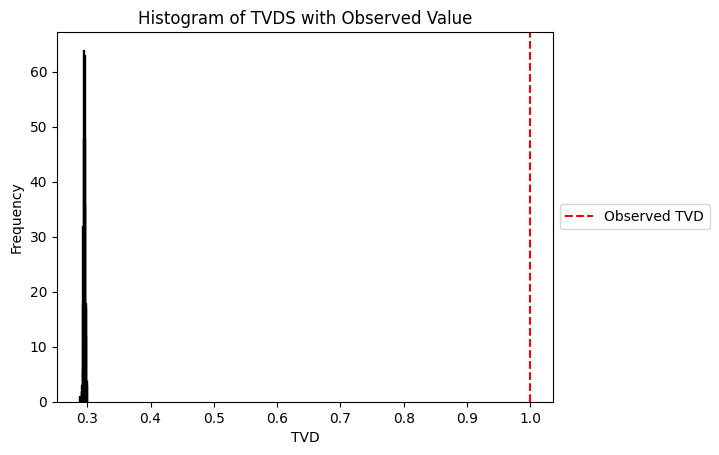

In [112]:
sns.histplot(tvds)
plt.axvline(x=observed_tvd, color='red', linestyle='--', label='Observed TVD')
plt.title('Histogram of TVDS with Observed Value')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [122]:
dist_1, dist_2 = total_variation_distance(df, missing_group, not_missing_group, col, verbose=True)
print(dist_1 == dist_2)
print(f'Shared proportions: {(dist_1 == dist_2).sum()}')

NHTSA Campaign
02V288000    False
02V236000    False
02V237000    False
02V241001    False
02E052000    False
             ...  
17V044000    False
16V562000    False
16V577000    False
16V803000    False
16E095000    False
Name: count, Length: 20684, dtype: bool
Shared proportions: 0


The observed TVD looks bizarre compared to our simulated results, however, we have double checked the results since our observed distributions are infact completely different from each other.

With a p-value of 0, we can conclude that the missingness of `'Manufacturer Campaign'` Missing at Random (MAR) on `'NHTSA Campaign'`. This means that the presence or absence of values in the 'Manufacturer Campaign' column is statistically significantly associated with the values in the 'NHTSA Campaign' column.

**NOTE: can do other cols later**

**Address unusual values in `'Model Year'`.**

<Axes: xlabel='Model Year', ylabel='Count'>

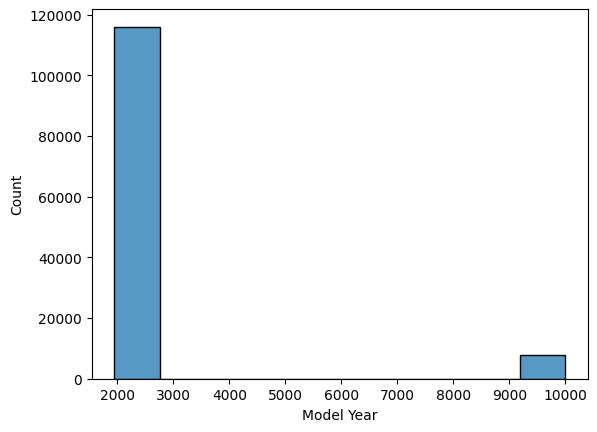

In [158]:
sns.histplot(df['Model Year'], bins=10)

We noticed that some observations had `'Model Year' = 9999`, which is a completely unrealistic value, so we will replace these with `np.nan`.

In [160]:
df['Model Year'] = df['Model Year'].replace(9999, np.nan)

## Exploratory Data Analysis

**Plot the number of units recalled each year.**

In [135]:
df['Year'] = df['Recall Notification Date'].dt.year
est_units_grouped_year = df.groupby('Year')['Estimated Units'].sum()

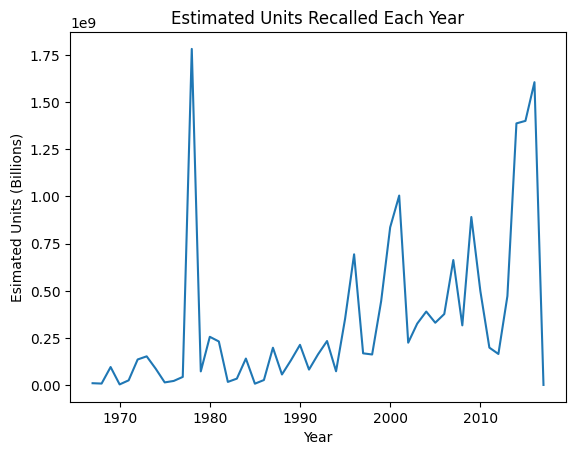

In [153]:
sns.lineplot(est_units_grouped_year)
plt.title('Estimated Units Recalled Each Year')
plt.ylabel('Esimated Units (Billions)')
plt.show()

The general trend seems to be that the amount of units getting recalled is increasing over time.

**Plot the makes that have the highest recalled units.**

In [190]:
est_units_grouped_make = df.groupby('Vehicle Make')['Estimated Units'].sum().sort_values(ascending=False)
est_units_grouped_make = est_units_grouped_make.take(np.arange(20)).reset_index()
est_units_grouped_make

,Vehicle Make,Estimated Units
0,FORD,3.773864e+09
1,CHEVROLET,2.298467e+09
2,HONDA,9.596681e+08
3,DODGE,9.026136e+08
4,GMC,8.030415e+08
5,TOYOTA,6.984547e+08
6,MERCURY,6.645924e+08
7,PONTIAC,5.803380e+08
8,LINCOLN,4.830383e+08
9,BUICK,4.300800e+08


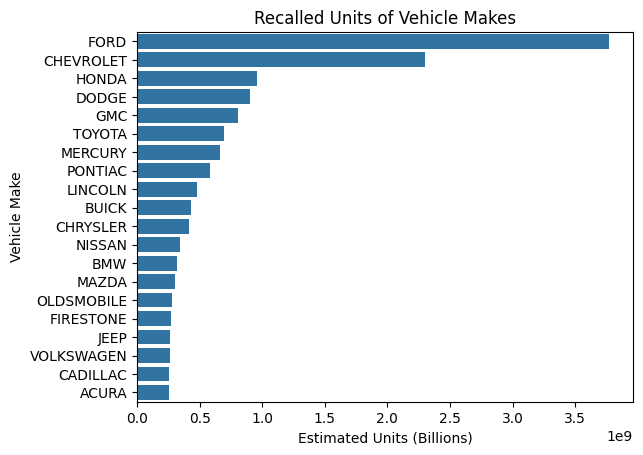

In [192]:
sns.barplot(est_units_grouped_make, x='Estimated Units', y='Vehicle Make')
plt.title('Recalled Units of Vehicle Makes')
plt.xlabel('Estimated Units (Billions)')
plt.show()

We can see that FORD has the highest number of units recalled at about 3.7 billion with CHEVROLET in second at about 2.4 billion.

**Visualize which FORD models have the most recalled units.**

In [193]:
ford_df = df[df['Vehicle Make'] == 'FORD']
model_grouped_units = ford_df.groupby('Vehicle Model')['Estimated Units'].sum().sort_values(ascending=False).take(np.arange(20)).reset_index()

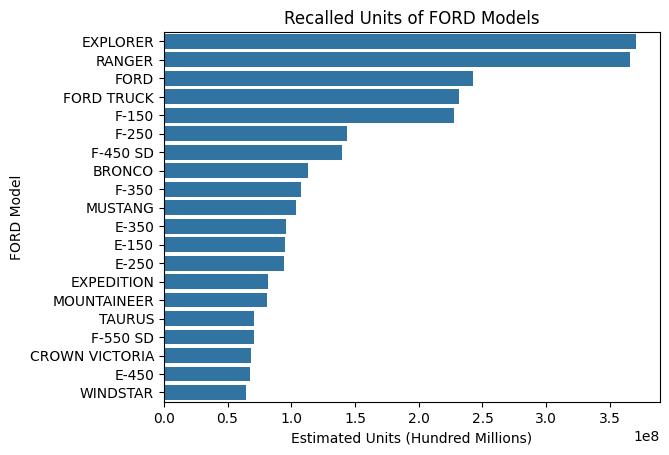

In [195]:
sns.barplot(model_grouped_units.reset_index(), x='Estimated Units', y='Vehicle Model')
plt.title('Recalled Units of FORD Models')
plt.ylabel('FORD Model')
plt.xlabel('Estimated Units (Hundred Millions)')
plt.show()

We can observe that the EXPLORER and RANGER are the FORD models with the most units recalled, and the rest of the models are relatively closer together.

**Visualize which components had the most recalled units.**

In [184]:
components_grouped_units = df.groupby('Recall Component')['Estimated Units'].sum().sort_values(ascending=False).take(np.arange(20))

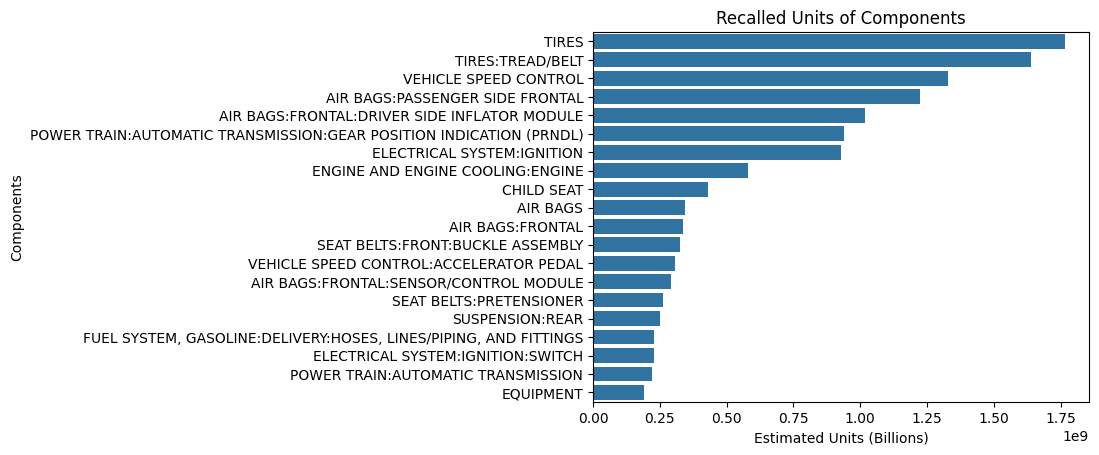

In [196]:
sns.barplot(components_grouped_units.reset_index(), x='Estimated Units', y='Recall Component')
plt.title('Recalled Units of Components')
plt.ylabel('Components')
plt.xlabel('Estimated Units (Billions)')
plt.show()

## Statistical Inference

**Label encode our categorical columns.**

In [126]:
categorical_cols = [
    'NHTSA Campaign',
    'Manufacturer Campaign',
    'Vehicle Make',
    'Vehicle Model',
    'Vehicle Manufacturer',
    'Recall Type',
    'Recall Component',
    'Recall Initiative',
    'Recall Manufacturer'
]
encoders = {}
encoded_df = df.copy()

for col in categorical_cols:
  encoder = LabelEncoder()
  encoded_df[col] = encoder.fit_transform(encoded_df[col])
  encoders[col] = encoder

encoded_df.head()

,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
Record ID,,,,,,,,,,,,,,
1,1559,144,927,7091,2001,1033,4,34,1999-07-19,2001-05-31,291854.0,1,775,2003-02-10
2,1559,144,927,7091,2000,1033,4,34,1999-07-19,2001-05-31,291854.0,1,775,2003-02-10
3,1491,5742,1259,7281,2003,1452,4,83,2002-07-30,2002-08-13,86.0,0,1084,2002-09-23
4,1492,5742,1153,3202,2003,1847,4,291,NaT,NaT,6223.0,0,1400,2002-11-05
5,1492,5742,1153,3202,2002,1847,4,291,NaT,NaT,6223.0,0,1400,2002-11-05
